In [1]:
pip install streamlit==1.11.0

     |████████████████████████████████| 9.1 MB 101.5 MB/s eta 0:00:01
  Attempting uninstall: streamlit
    Found existing installation: streamlit 1.12.0
    Uninstalling streamlit-1.12.0:
      Successfully uninstalled streamlit-1.12.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pyngrok

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Get the name of the classes

import os
cwd = os.path.join(os.getcwd(), "Crochet_Stitches_Dataset")
cwd
classes = []
for file in os.scandir(cwd):
    if not file.name.startswith('.'):
        classes.append(file.name)
classes

['SC', 'DC', 'HDC']

In [5]:
%%writefile app.py

# Adapted from
# https://github.com/nachi-hebbar/Flower-Classification-Web-App-Streamlit/blob/main/Flower_Classification_WebApp%20(1).ipynb

import streamlit as st
import tensorflow as tf
import streamlit as st
from tensorflow.keras.applications.xception import Xception,preprocess_input as xception_preprocess_input

@st.cache(allow_output_mutation=True)
def load_model():
    model=tf.keras.models.load_model('xception_model.keras')
    return model
with st.spinner('Model is being loaded..'):
    model=load_model()

st.write("""
         # Crochet Stitches Classification
         """
         )

file = st.file_uploader("Please upload an image of the crochet stitch", type=["jpg", "png", "jpeg"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
    size = (180,180)    
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    image = np.asarray(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = xception_preprocess_input(image)

    img_reshape = img[np.newaxis,...]

    prediction = model.predict(img_reshape)

    return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(predictions)
    st.write(score)
    class_names = ['Single Crochet', 'Double Crochet', 'Half Double Crochet']
    res = "This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100*np.max(score))
    st.text(res)

Overwriting app.py


In [6]:
!ngrok authtoken 2SNsBb4SSo5MgswBLoV9ZgMrlO8_vqkCU2i1uogXU7DU9zSS

Authtoken saved to configuration file: /Users/stephanieyolanda/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py

appending output to nohup.out


2023-07-17 16:37:58.573580: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(180, 180, 3)


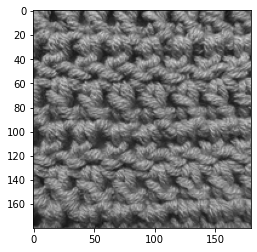

In [1]:
# Testing image pre-processing

from PIL import Image, ImageOps
import numpy as np
import cv2
from skimage.color import rgb2gray
from tensorflow.keras.applications.xception import Xception,preprocess_input as xception_preprocess_input
import matplotlib.pyplot as plt

size = (180,180)    
image_data = Image.open('Crochet_Stitches_Dataset/DC/IMG_0268.jpeg')
size = (180,180)    
image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
image = np.asarray(image)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_reshape = image[np.newaxis,...]

print(image.shape)
plt.imshow(image)